In [45]:
try:
    import tensorflow as tf
    from tensorflow.python import keras
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    %matplotlib inline
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import confusion_matrix,classification_report
    from keras.models import Sequential
    from keras.layers import Dense
    from sklearn.preprocessing import LabelEncoder
    print('Library Loaded .........')
except:
    print('One or More Library was not Found ! ')

Library Loaded .........


In [46]:
df = pd.read_csv("career_pred.csv")

In [47]:
df.head()

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,...,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,69,63,78,87,94,94,87,84,61,9,...,Prayer books,salary,no,stubborn,Management,salary,hard worker,yes,no,Database Developer
1,78,62,73,60,71,70,73,84,91,12,...,Childrens,salary,yes,gentle,Technical,salary,hard worker,no,yes,Portal Administrator
2,71,86,91,87,61,81,72,72,94,11,...,Travel,Work,no,stubborn,Management,work,hard worker,no,yes,Portal Administrator
3,76,87,60,84,89,73,62,88,69,7,...,Romance,Work,yes,gentle,Management,work,smart worker,yes,yes,Systems Security Administrator
4,92,62,90,67,71,89,73,71,73,4,...,Cookbooks,salary,no,stubborn,Management,work,hard worker,yes,yes,Business Systems Analyst


In [48]:
df.shape

(20000, 39)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 39 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Acedamic percentage in Operating Systems  20000 non-null  int64 
 1   percentage in Algorithms                  20000 non-null  int64 
 2   Percentage in Programming Concepts        20000 non-null  int64 
 3   Percentage in Software Engineering        20000 non-null  int64 
 4   Percentage in Computer Networks           20000 non-null  int64 
 5   Percentage in Electronics Subjects        20000 non-null  int64 
 6   Percentage in Computer Architecture       20000 non-null  int64 
 7   Percentage in Mathematics                 20000 non-null  int64 
 8   Percentage in Communication skills        20000 non-null  int64 
 9   Hours working per day                     20000 non-null  int64 
 10  Logical quotient rating                   2000

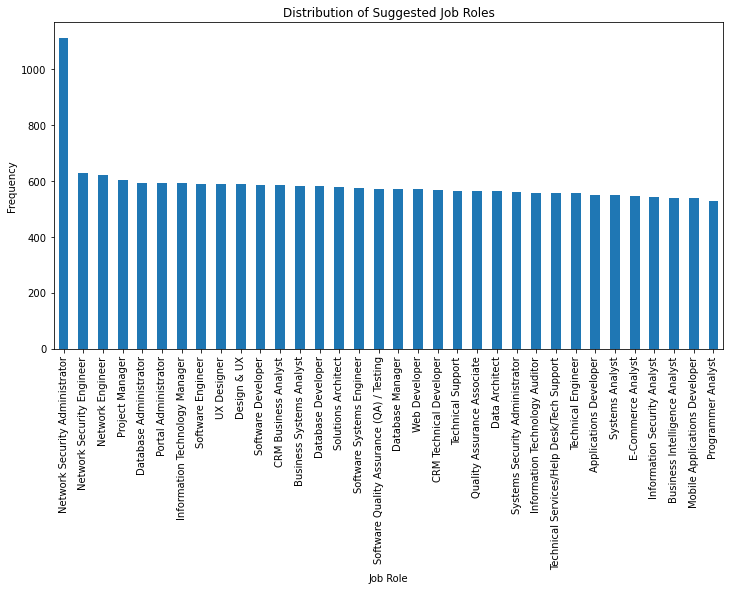

In [50]:
# pd.unique(df["Suggested Job Role"])
# Plot the distribution of the 'Suggested Job Role' column
plt.figure(figsize=(12, 6))
df['Suggested Job Role'].value_counts().plot(kind='bar')
plt.title('Distribution of Suggested Job Roles')
plt.xlabel('Job Role')
plt.ylabel('Frequency')
plt.show()

In [51]:
null_values = df.isnull().sum()
print(null_values)

Acedamic percentage in Operating Systems    0
percentage in Algorithms                    0
Percentage in Programming Concepts          0
Percentage in Software Engineering          0
Percentage in Computer Networks             0
Percentage in Electronics Subjects          0
Percentage in Computer Architecture         0
Percentage in Mathematics                   0
Percentage in Communication skills          0
Hours working per day                       0
Logical quotient rating                     0
hackathons                                  0
coding skills rating                        0
public speaking points                      0
can work long time before system?           0
self-learning capability?                   0
Extra-courses did                           0
certifications                              0
workshops                                   0
talenttests taken?                          0
olympiads                                   0
reading and writing skills        

In [52]:
for column in df.columns:
    unique_elements = df[column].unique()
    print(f"Unique elements in '{column}':")
    print(unique_elements)
    print("\n")

Unique elements in 'Acedamic percentage in Operating Systems':
[69 78 71 76 92 88 93 84 73 62 63 68 90 94 60 82 67 65 74 75 83 89 80 70
 66 85 61 81 79 86 64 91 72 77 87]


Unique elements in 'percentage in Algorithms':
[63 62 86 87 77 72 66 76 80 64 93 83 71 92 91 73 61 89 67 74 82 60 68 88
 70 85 81 78 84 69 94 75 65 79 90]


Unique elements in 'Percentage in Programming Concepts':
[78 73 91 60 90 62 69 88 66 85 70 81 61 77 63 94 68 76 75 93 64 65 84 72
 80 86 74 83 67 79 71 87 92 82 89]


Unique elements in 'Percentage in Software Engineering':
[87 60 84 67 79 62 81 91 83 90 71 74 63 86 70 75 92 93 72 78 85 64 82 65
 69 94 73 66 80 68 61 88 77 76 89]


Unique elements in 'Percentage in Computer Networks':
[94 71 61 89 93 90 66 81 82 70 77 65 62 64 78 63 67 86 69 92 84 85 87 68
 83 60 88 74 75 80 91 72 76 73 79]


Unique elements in 'Percentage in Electronics Subjects':
[94 70 81 73 89 84 93 63 69 82 72 67 65 61 88 91 74 90 80 79 75 62 76 77
 83 92 60 71 68 66 87 64 86 85 78]


Uniqu

In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Acedamic percentage in Operating Systems,20000.0,77.00230,10.085697,60.0,68.0,77.0,86.0,94.0
percentage in Algorithms,20000.0,76.94820,10.101733,60.0,68.0,77.0,86.0,94.0
Percentage in Programming Concepts,20000.0,77.01755,10.134815,60.0,68.0,77.0,86.0,94.0
Percentage in Software Engineering,20000.0,77.09450,10.087837,60.0,68.0,77.0,86.0,94.0
Percentage in Computer Networks,20000.0,76.95820,10.020088,60.0,68.0,77.0,85.0,94.0
Percentage in Electronics Subjects,20000.0,77.01555,10.168888,60.0,68.0,77.0,86.0,94.0
Percentage in Computer Architecture,20000.0,77.06985,10.069059,60.0,68.0,77.0,86.0,94.0
Percentage in Mathematics,20000.0,76.91310,10.138555,60.0,68.0,77.0,86.0,94.0
Percentage in Communication skills,20000.0,76.92145,10.103494,60.0,68.0,77.0,86.0,94.0
Hours working per day,20000.0,7.98595,2.593798,4.0,6.0,8.0,10.0,12.0


In [54]:
for column in object_columns.columns:
    print(f"Description of '{column}':")
    print(object_columns[column].describe())
    print("\n")

Description of 'can work long time before system?':
count     20000
unique        2
top         yes
freq      10020
Name: can work long time before system?, dtype: object


Description of 'self-learning capability?':
count     20000
unique        2
top         yes
freq      10102
Name: self-learning capability?, dtype: object


Description of 'Extra-courses did':
count     20000
unique        2
top          no
freq      10049
Name: Extra-courses did, dtype: object


Description of 'certifications':
count             20000
unique                9
top       r programming
freq               2275
Name: certifications, dtype: object


Description of 'workshops':
count                20000
unique                   8
top       web technologies
freq                  2586
Name: workshops, dtype: object


Description of 'talenttests taken?':
count     20000
unique        2
top         yes
freq      10047
Name: talenttests taken?, dtype: object


Description of 'olympiads':
count     20000
unique

In [55]:
# List of columns to be label encoded
columns_to_encode = [
    'can work long time before system?', 'self-learning capability?', 'Extra-courses did',
    'talenttests taken?', 'olympiads', 'In a Realtionship?', 'Gentle or Tuff behaviour?',
    'Management or Technical', 'Salary/work', 'hard/smart worker', 'worked in teams ever?', 'Introvert'
]

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the specified columns
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

# Display the first few rows to verify the changes
df.head()

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,...,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,69,63,78,87,94,94,87,84,61,9,...,Prayer books,salary,0,1,0,0,0,1,0,Database Developer
1,78,62,73,60,71,70,73,84,91,12,...,Childrens,salary,1,0,1,0,0,0,1,Portal Administrator
2,71,86,91,87,61,81,72,72,94,11,...,Travel,Work,0,1,0,1,0,0,1,Portal Administrator
3,76,87,60,84,89,73,62,88,69,7,...,Romance,Work,1,0,0,1,1,1,1,Systems Security Administrator
4,92,62,90,67,71,89,73,71,73,4,...,Cookbooks,salary,0,1,0,1,0,1,1,Business Systems Analyst
